In [1]:
__author__ = "Max Newcomer"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def isPositiveDefinite(A, printDisks = False, plotDisks = False) -> str:
    """
    Returns the "Definiteness" of a matrix using
    Gershgorin disks. Instead of calculating eigenvalues
    we can use the disks to eliminate a factor of n computations
    
    Finding Exact Eigenvalues - O(n^3)
    Estimating Gershgorin Disks - O(n^2)
    
    input:
        A - Square matrix (currently must be a real matrix, however
                            complex matrix computation is on todo)
        printDisks - Prints the bounds of Gershgorin disks
        plotDisks - Plots disks on complex plane along with associated eigenvalues
    
    output:
        'PSD' - Positive Semi-Definite
        'NSD' - Negative Semi-Definite
        'PD' - Positive Definite
        'ND' - Negative Definite
        'Inconclusive' - Estimating Gershgorin Disks wasn't enough to get a
            conclusive answer
    Note: Output is at least, so if PSD is outputted the matrix is at least Positive Semi-Definite, however it could be Positive Definite.
    """
    (n, m) = A.shape
    GershgorinDisks = []
    if plotDisks:
        ax = plt.gca()
        maxR = minC = maxC = 0
    for i in range(n):
        R_j = 0
        C_j = A[i, i]
        
        for j in range(m):
            if i != j:
                R_j += np.abs(A[i, j])
        disk = (C_j - np.abs(R_j), C_j + np.abs(R_j))
        GershgorinDisks.append(disk)
        if plotDisks:
            if C_j < minC:
                minC = C_j
            if C_j > maxC:
                maxC = C_j
            if np.abs(R_j) > maxR:
                maxR = np.abs(R_j)
            circle = plt.Circle((C_j, 0), np.abs(R_j), color='b', alpha = .1)
            ax.add_patch(circle)
            
    if printDisks:
        print(GershgorinDisks)
    if plotDisks:
        plt.axhline(0,color='k', alpha = .3)
        plt.axvline(0,color='k', alpha = .3)
        print(np.linalg.eig(A)[0])
        for eig in np.linalg.eig(A)[0]:  
            plt.scatter(x = eig.real, y = eig.imag,color='k', alpha = 1)
        ax.set_xlim((minC - maxR - 3, maxC + maxR + 3))
        ax.set_ylim(((-maxR - 3), (maxR + 3)))
        plt.xlabel("Real Component")
        plt.ylabel("Imaginary Component")
        plt.title("Gershgorin Estimation of Eigenvalues")
        ax.set_aspect('equal')
#         plt.plot()
    
    
    isPositive = isNegative = True
    isSemi = False
    for disk in GershgorinDisks:
        if disk[0] < 0: isPositive = False
        if disk[1] > 0: isNegative = False
        if disk[0] == 0 or disk[1] == 0: isSemi = True
    if isPositive and not isNegative:
        if isSemi:
            return "PSD"
        return "PD"
    elif isNegative and not isPositive:
        if isSemi:
            return "NSD"
        return "ND"
    else:
        return "Inconclusive"
    

        

[(1, 3), (0, 4), (1, 3)]
[3.41421356 2.         0.58578644]


'PSD'

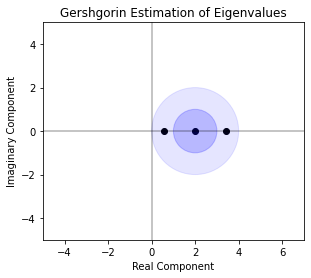

In [4]:
A = np.array([[2, -1, 0],
              [-1, 2, -1], 
              [0, -1, 2]])
isPositiveDefinite(A, printDisks = True, plotDisks = True)

[(-8, 12), (0, 4), (1, 3)]
[2.+3.j 2.-3.j 2.+0.j]


'Inconclusive'

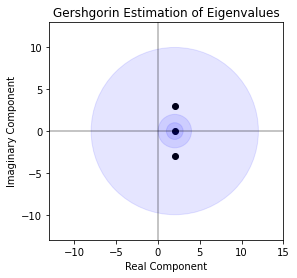

In [5]:
A = np.array([[2, 10, 0],
              [-1, 2, -1], 
              [0, -1, 2]])
isPositiveDefinite(A, printDisks = True, plotDisks = True)

[[ 49   8 -19   9 -10]
 [  8  35  -2  18   3]
 [-19  -2  36   3   1]
 [  9  18   3  83  15]
 [-10   3   1  15  77]]
[(3, 95), (4, 66), (11, 61), (38, 128), (48, 106)]
[99.62493996 77.57640521 54.27120809 20.39383177 28.13361497]
PD


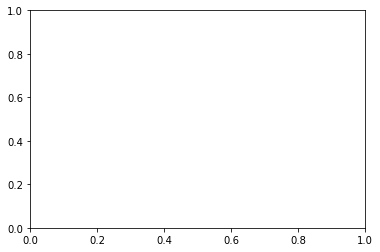

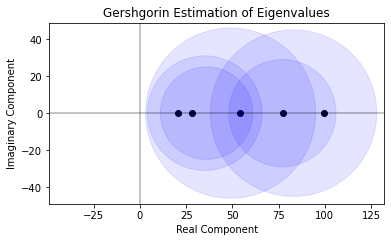

[[ 44 -18   0   8 -12]
 [-18  38   6  -3  -7]
 [  0   6  28  10   6]
 [  8  -3  10  50   1]
 [-12  -7   6   1  39]]
[(6, 82), (4, 72), (6, 50), (28, 72), (13, 65)]
[12.29114015 64.70353081 24.76444396 52.63344793 44.60743715]
PD


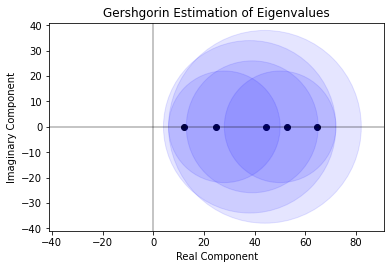

[[ 22  -3  11  -2  -2]
 [ -3  42 -10  -4 -15]
 [ 11 -10  47   8   0]
 [ -2  -4   8  54  -2]
 [ -2 -15   0  -2  29]]
[(4, 40), (10, 74), (18, 76), (38, 70), (10, 48)]
[16.00318824 18.83905653 65.10076385 42.81425508 51.2427363 ]
PD


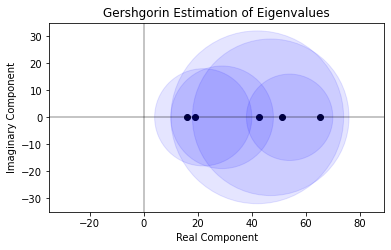

[[ 23  -1 -11  -2   1]
 [ -1  24  -1  -3 -17]
 [-11  -1  30   1   8]
 [ -2  -3   1  19  -5]
 [  1 -17   8  -5  42]]
[(8, 38), (2, 46), (9, 51), (8, 30), (11, 73)]
[54.7581192  37.06949717 22.16865529  9.781279   14.22244935]
PD


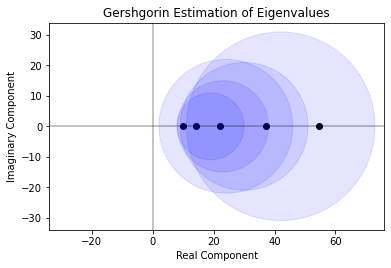

[[ 59  -1 -26  23   2]
 [ -1  43 -17  -3  -8]
 [-26 -17  92  13  21]
 [ 23  -3  13  66 -17]
 [  2  -8  21 -17  67]]
[(7, 111), (14, 72), (15, 169), (10, 122), (19, 115)]
[117.32360718  17.965677    87.06891809  67.11035853  37.53143921]
PD


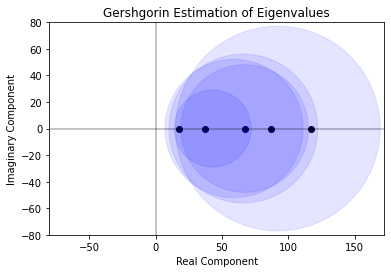

[[ 37  -1  -5  -9 -21]
 [ -1  77 -11 -15  33]
 [ -5 -11  23   3   4]
 [ -9 -15   3  47  -4]
 [-21  33   4  -4  63]]
[(1, 73), (17, 137), (0, 46), (16, 78), (1, 125)]
[109.36171838  63.40864777  37.07684798  20.51295391  16.63983197]
PSD


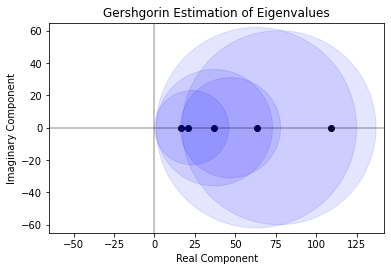

In [6]:
rng = np.random.default_rng(123)
n = 5
plt.cla()
for i in range(10000):
    B = np.stack([rng.integers(low = -5, high = 5, size = n) for _ in range(n)])
    BtB = B.T@B
    if isPositiveDefinite(BtB) != "Inconclusive":
        print(BtB)
        plt.figure()
        print(isPositiveDefinite(BtB, printDisks = True, plotDisks = True))
        plt.show()

